# PRACTICA GUIADA: KNN

## Introducción

En esta práctica vamos utilizar a KNN para resolver un problema de clasificación.
Vamos a realizar los siguientes pasos:

1. Cargar el dataset
2. Preparar la matriz de features y el vector de targets
3. Elegir el valor óptimo para el hiperparámetro n_neighbours utilizando CROSS VALIDATION
4. Repetir el proceso pero estandarizando la matriz de features para ver los efectos sobre el algoritmo 
5. Matriz de confusión

## 1 - Importar el dataset

El dataset market.csv contiene datos de las acciones que conforman el índice S & P 500 tomados de la web de Yahoo Finance entre los años 2000 y 2001.

A continuación una descripción de las columnas:

* **Lag1:** Percentage return for previous day
* **Lag2:** Percentage return for 2 days previous
* **Lag3:** Percentage return for 3 days previous
* **Lag4:** Percentage return for 4 days previous
* **Lag5:** Percentage return for 5 days previous
* **Volume:** Volume of shares traded (number of daily shares traded in billions)
* **Today:** Percentage return for today
* **Direction:** A factor with levels Down and Up indicating whether the market had a positive or negative
return on a given day


In [3]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv('../Data/market.csv')

In [6]:
df.sample(5)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
310,1133.0,-666.0,228.0,-321.0,84.0,1.44790,-2369.0,Down
228,-1587.0,-753.0,-278.0,2232.0,1319.0,1.21870,-278.0,Down
370,3673.0,622.0,-2123.0,-2139.0,-83.0,0.69940,-1218.0,Down
1115,-71.0,495.0,363.0,222.0,257.0,1.71453,-205.0,Down
999,-812.0,-134.0,8.0,-7.0,715.0,1.51080,-1167.0,Down


## 2 - Construimos la matriz de features y el vector de targets

In [7]:
df.columns

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction'], dtype='object')

In [8]:
# Construimos la matriz de features, subseteando el DataFrame para que no contenga la clase, Direction
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]

#### Haciendo numérico el vector de targets
El vector de targets vino codificado con los posibles valores de 'Up' o 'Down' pero recordemos que scikitlearn sólo acepta valores numéricos (aún si estos representan clases) por lo tanto siempre tenemos que darle una etiqueta numérica a las clases, ya sea que tomen dos posibles valores o más.
Eso lo hacemos con la clase LabelEncoder()

In [9]:
# Construimos el vector de targets
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Direction'])
y

array([1, 1, 0, ..., 1, 0, 0])

## 3 - Evaluamos distintos valores para el hiperparámetro

Ahora vamos a ejecutar el modelo KNeighborsClassifier probando distintos valores posibles para el hiperparámetro n_neighbors.


In [10]:
from sklearn.model_selection import cross_val_score

# Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
# Para esto voy a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame

#Lista de Diccionarios
scores_para_df = []

# range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
# hasta el 40 en saltos de a 5. (Start,Stop,Step)
for i in range(1,100,5):
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [11]:
scores_para_df

[{'n_neighbours': 1,
  'score_medio': 0.50013108689739039,
  'score_std': 0.047462879249597571},
 {'n_neighbours': 6,
  'score_medio': 0.48403809340949461,
  'score_std': 0.024568246196812721},
 {'n_neighbours': 11,
  'score_medio': 0.50806073697179155,
  'score_std': 0.031358576175147167},
 {'n_neighbours': 16,
  'score_medio': 0.50086392422278758,
  'score_std': 0.023810245433530986},
 {'n_neighbours': 21,
  'score_medio': 0.51123845181522909,
  'score_std': 0.025397268795112643},
 {'n_neighbours': 26,
  'score_medio': 0.51047682682922935,
  'score_std': 0.034266916752113206},
 {'n_neighbours': 31,
  'score_medio': 0.50801603865661848,
  'score_std': 0.023255001341725746},
 {'n_neighbours': 36,
  'score_medio': 0.51764171586745389,
  'score_std': 0.036007670799688286},
 {'n_neighbours': 41,
  'score_medio': 0.53682917166674671,
  'score_std': 0.018855286941630078},
 {'n_neighbours': 46,
  'score_medio': 0.53920678410854583,
  'score_std': 0.022334689287494016},
 {'n_neighbours': 51,


In [12]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.sample(5)

,n_neighbours,score_medio,score_std
3,16,0.500864,0.023810
5,26,0.510477,0.034267
4,21,0.511238,0.025397
16,81,0.503962,0.017984
0,1,0.500131,0.047463


#### Graficando la búsqueda del mejor hiperparámetro

El valor de scoring que utiliza por defecto KNeighborsClassifier es el accuracy:

**\# casos bien clasificados / # total.**

Una vez que tenemos el DataFrame con la performance para cada valor del hiperparámetro hacemos un gráfico con los valores. Para darnos una idea de la dispersión vamos a graficar también las líneas que indican un desvío estándar por encima y por debajo de la media





In [13]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']

In [14]:
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

In [15]:
df_scores.head()

,n_neighbours,score_medio,score_std,limite_inferior,limite_superior
0,1,0.500131,0.047463,0.452668,0.547594
1,6,0.484038,0.024568,0.459470,0.508606
2,11,0.508061,0.031359,0.476702,0.539419
3,16,0.500864,0.023810,0.477054,0.524674
4,21,0.511238,0.025397,0.485841,0.536636


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


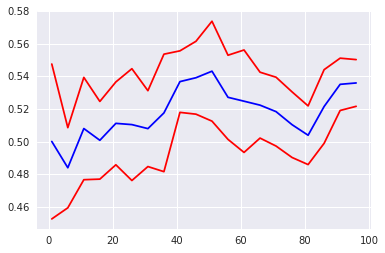

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

## 4 - Estandarización de las variables

Dijimos que KNN es un método de Machine Learning que se basa en medidas de distancia. Si bien 6 de nuestras 7 variables se encuentran en las mismas unidades, hay una de ellas que no, la variable Volume.

Para darle mayor interpretabilidad matemática al proceso que estamos haciendo, lo correcto sería estandarizar las variables para deshacernos de las unidades físicas.

In [17]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn import preprocessing
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
X = preprocessing.scale(X, axis = 0)

In [18]:
# Verificamos que las columnas tengan media 0 y desvío 1.
print('media:',np.mean(X[:,1]))
print('desvio:',np.std(X[:,1]))

media: 2.84217094304e-18
desvio: 1.0


In [19]:
# Calculamos nuevamente los scores de cross validation, pero esta vez sobre los features estandarizados
from sklearn.model_selection import cross_val_score
scores_para_df_standar = []
for i in range(1,100,5):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X, y, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [20]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head()

,n_neighbours,score_medio,score_std
0,1,0.500131,0.047463
1,6,0.482438,0.024114
2,11,0.509667,0.034981
3,16,0.500064,0.024804
4,21,0.509638,0.027123


In [21]:
# Armamos nuevamente los límites para graficar
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


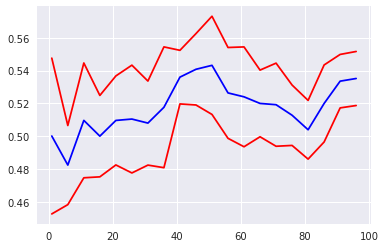

In [22]:
# Buscamos gráficamente el valor ópitmo para n_neighbors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

#### Evaluando los resultados

En este caso observamos que la estandarización no genera ningún cambio significativo en los resultados del modelo
¿Por qué observamos esto?
Porque en este modelo todas las variables están expresadas en las mismas unidades, con lo cual no era necesario reescalar cada uno de los componentes para poder construir una matriz de distancias que tuviera sentido.

## 5 - Matriz de confusión

Ahora que decidimos cuál es el mejor preprocesamiento y el mejor valor posible para los hiperparámetros podemos entrenar un modelo con estos criterios para obtener una matriz de confusión sobre datos no observados. 

### 5.1- Preprocesamos los datos
(repetimos los pasos de arriba sólo para que el proceso completo sea más claro)

In [23]:
# Matriz de features
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
# X = preprocessing.scale(X, axis = 0)

# Vector de targets
le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Direction'])

### 5.2- Split train-test

Ya sabiendo cuál es el mejor modelo, quiero obtener una matriz de confusión. Hacemos un nuevo split train-test porque siempre queremos evaluar dónde predice bien y dónde se equivoca el modelo **sobre datos no observados**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=98)
# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=98, p=2,
           weights='uniform')

In [26]:
# Lo utilizamos para predecir en test
y_pred = model.predict(X_test)

In [27]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 42, 120],
       [ 30, 121]])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


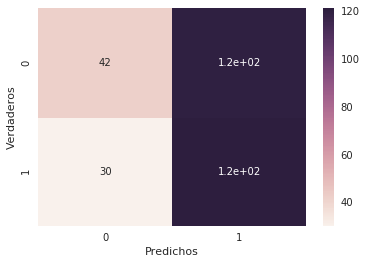

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [29]:
# Recordemos los valores de las labeles que creamos con el metodo  LabelEncoder()
le.classes_

array(['Down', 'Up'], dtype=object)

Conclusión: No parece ser nada fácil predecir la evolución de las acciones en base a los features utilizados. El modelo tiene un sesgo hacia predecir que las acciones van a subir. 